# Denoising Dirty Documents
Optical Character Recognition (OCR) is the process of getting type or handwritten documents into a digitized format. If you've read a classic novel on a digital reading device or had your doctor pull up old healthcare records via the hospital computer system, you've probably benefited from OCR.

OCR makes previously static content editable, searchable, and much easier to share. But, a lot of documents eager for digitization are being held back. Coffee stains, faded sun spots, dog-eared pages, and lot of wrinkles are keeping some printed documents offline and in the past. 

This competition challenges you to give these documents a machine learning makeover. Given a dataset of images of scanned text that has seen better days, you're challenged to remove the noise. Improving the ease of document enhancement will help us get that rare mathematics book on our e-reader before the next beach vacation.

We've kicked off the fun with a few handy scripts to get you started on the dataset.
Acknowledgements

Kaggle is hosting this competition for the machine learning community to use for fun and practice. This dataset was created by RM.J. Castro-Bleda, S. España-Boquera, J. Pastor-Pellicer, F. Zamora-Martinez. We also thank the UCI machine learning repository for hosting the dataset. If you use the problem in publication, please cite:

Bache, K. & Lichman, M. (2013). UCI Machine Learning Repository. Irvine, CA: University of California, School of Information and Computer Science

## AIM:
* To Denoise the images using Encoder-Decoder Model

## Dataset:
* https://www.kaggle.com/c/denoising-dirty-documents/data
* We are provided two sets of images, train and test. These images contain various styles of text, to which synthetic noise has been added to simulate real-world, messy artifacts. The training set includes the test without the noise (train_cleaned). You must create an algorithm to clean the images in the test set.

In [1]:
# https://www.kaggle.com/c/denoising-dirty-documents/data

! wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.149 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/4406/34170/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1585230395&Signature=tT3FwXrzJX0%2FZSzS3g5RvxGfzopn4iuB9fbz7fa6Ex9A1%2BlVF4oH4i1m%2BVpgi%2FTEctgCxBOWN5wVjHH6qJtwIVR2tGJZbpjkOgKlA2w7%2Bzj2YeFT3vCfs7I0pe0LPHrt%2FcqjF%2B%2F5RdebUbWsAvsqVdBdP77g5JKgOxzcKNGIHk4iDB8jnbObcufGvtZLgXMAcAdhik7SDswfNFPsfA0iaaEM3YiM%2FzFj1jreQHoZmeF%2FX%2BukBxS9csoq%2B0KyBhdFLJn2HVGMRJ%2BimrQjoDE94HRjpB4WWScCKArlA0tou94JtSshDnxyl3RwJVsHLfPaU9qiE48TqZH6qnUdDt8Ivg%3D%3D&response-content-disposition=attachment%3B+filename%3Ddenoising-dirty-documents.zip" -O "denoising-dirty-documents.zip" -c

--2020-03-24 12:32:06--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/4406/34170/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1585230395&Signature=tT3FwXrzJX0%2FZSzS3g5RvxGfzopn4iuB9fbz7fa6Ex9A1%2BlVF4oH4i1m%2BVpgi%2FTEctgCxBOWN5wVjHH6qJtwIVR2tGJZbpjkOgKlA2w7%2Bzj2YeFT3vCfs7I0pe0LPHrt%2FcqjF%2B%2F5RdebUbWsAvsqVdBdP77g5JKgOxzcKNGIHk4iDB8jnbObcufGvtZLgXMAcAdhik7SDswfNFPsfA0iaaEM3YiM%2FzFj1jreQHoZmeF%2FX%2BukBxS9csoq%2B0KyBhdFLJn2HVGMRJ%2BimrQjoDE94HRjpB4WWScCKArlA0tou94JtSshDnxyl3RwJVsHLfPaU9qiE48TqZH6qnUdDt8Ivg%3D%3D&response-content-disposition=attachment%3B+filename%3Ddenoising-dirty-documents.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 2a00:1450:4013:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37460781 (36M) [application/zip]
Saving to: ‘denoising-dirty-documents.zip’


In [2]:
# We import necessary Libraries

import shutil
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split

#import openCV
import cv2
from PIL import Image

#importing tensorflow
import tensorflow as tf
from tensorflow.keras.layers import Dense,Input,Conv2D,MaxPool2D,Activation,Dropout,Flatten,UpSampling2D, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import applications, optimizers
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

In [0]:
# We need to unzip the main file and extract the sub zip folders.

# https://stackoverflow.com/a/3451150/10219869
import zipfile
with zipfile.ZipFile('/content/denoising-dirty-documents.zip', 'r') as zip_ref:
  zip_ref.extractall()

In [0]:
# We need to unzip the subzip files and extract the folders.

with zipfile.ZipFile('/content/test.zip', 'r') as test:
  test.extractall()

with zipfile.ZipFile('/content/train.zip', 'r') as train:
  train.extractall()

with zipfile.ZipFile('/content/train_cleaned.zip', 'r') as train_cleaned:
  train_cleaned.extractall()


### Sample Image of Noise and Denoise

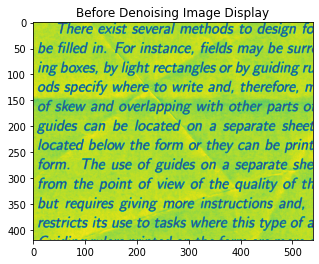

In [5]:
# https://stackoverflow.com/a/35287898/10219869

import matplotlib.image as mpimg
img=mpimg.imread('/content/train/101.png')
imgplot = plt.imshow(img)
plt.title('Before Denoising Image Display')
plt.show()

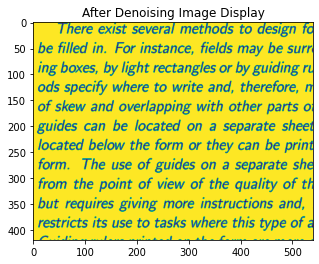

In [6]:
# https://stackoverflow.com/a/35287898/10219869

import matplotlib.image as mpimg
img=mpimg.imread('/content/train_cleaned/101.png')
imgplot = plt.imshow(img)
plt.title('After Denoising Image Display')
plt.show()


### Data Segregation

In [7]:
x_train= []

path= '/content/train/'
for i in os.listdir(path= path):
  x_train.append((path+str(i)))
print('Total images in train dataset: ',len(x_train))

y_train= []

path= '/content/train_cleaned/'
for i in os.listdir(path= path):
  y_train.append((path+str(i)))

print('Total images in train_cleaned dataset: ',len(y_train))

test= []

path= '/content/test/'
for i in os.listdir(path= path):
  test.append((path+str(i)))

print('Total images in test dataset: ',len(test))

Total images in train dataset:  144
Total images in train_cleaned dataset:  144
Total images in test dataset:  72


In [8]:
x_train[:5]

['/content/train/135.png',
 '/content/train/137.png',
 '/content/train/41.png',
 '/content/train/150.png',
 '/content/train/209.png']

In [9]:
# To check the sample size of the image

for i in x_train[:5]:
  img = cv2.imread(i)
  height, width, channels = img.shape
  print(img.shape)

(420, 540, 3)
(420, 540, 3)
(258, 540, 3)
(420, 540, 3)
(420, 540, 3)


In [10]:
# To check max height and max width and min height and min width

# To check the sample size of the image

ht=[]
wd= []
for i in x_train:
  img = cv2.imread(i)
  height, width, channels = img.shape
  ht.append(img.shape[0])
  wd.append(img.shape[1])

print('Max Height of image in x_train', max(ht))
print('Min Height of image in x_train', min(ht))
print('Max Width of image in x_train', max(wd))
print('Min Width of image in x_train', max(wd))

Max Height of image in x_train 420
Min Height of image in x_train 258
Max Width of image in x_train 540
Min Width of image in x_train 540


In [11]:
# To check max height and max width and min height and min width

# To check the sample size of the image

ht=[]
wd= []
for i in y_train:
  img = cv2.imread(i)
  height, width, channels = img.shape
  ht.append(img.shape[0])
  wd.append(img.shape[1])

print('Max Height of image in y_train', max(ht))
print('Min Height of image in y_train', min(ht))
print('Max Width of image in y_train', max(wd))
print('Min Width of image in y_train', max(wd))

Max Height of image in y_train 420
Min Height of image in y_train 258
Max Width of image in y_train 540
Min Width of image in y_train 540


### Observation:
* As we see the minimum height of image is 258 and width remains the same and hence we convert all the heights into 258.

In [0]:
# we need to resize and rescale the images

new_shape = (258, 540, 1)
def load_images(path):
    image_list = []
    for i in path:
        img = cv2.imread(i,0) # read grayscale image
        img = cv2.resize(img, (new_shape[1], new_shape[0]))
        img = img / 255.
        img = np.expand_dims(img, axis=-1) # we get channel as 1 in output.
        image_list.append(img)
    return image_list

In [13]:
new_x_train= load_images(x_train)
new_y_train= load_images(y_train)
new_test= load_images(test)

new_x_train[0].shape

(258, 540, 1)

In [14]:
# convert to array as lists are not accepted in conv

new_x_train= np.array(new_x_train)
new_y_train= np.array(new_y_train)
new_test= np.array(new_test)

print('Shape of Single image:',new_x_train[0].shape)
print('Shape of All images:',new_x_train.shape)

Shape of Single image: (258, 540, 1)
Shape of All images: (144, 258, 540, 1)


### We split the data into Train and Validation, within initial Train data.

In [15]:
x_tr, x_val, y_tr, y_val = train_test_split(new_x_train, new_y_train, test_size=0.3, random_state=42)
print('Train data:',x_tr.shape)
print('Validation data:', x_val.shape)

Train data: (100, 258, 540, 1)
Validation data: (44, 258, 540, 1)


### Encoder - Decoder Model

In [16]:
 
#Encoder
model= Sequential()
model.add(Conv2D(filters= 128, kernel_size= (3,3), activation='relu', padding='same', name='Conv1', input_shape= new_shape))
model.add(BatchNormalization(name= 'BN1'))
model.add(MaxPool2D((2,2), padding='same', name='pool1'))

#Decoder
model.add(Conv2D(filters= 128, kernel_size= (3,3), activation='relu', padding='same', name='Conv2'))
model.add(UpSampling2D((2,2), name='upsample1'))
model.add(Conv2D(filters= 1, kernel_size= (3,3), activation='sigmoid', padding='same', name='Conv3'))
    
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 258, 540, 128)     1280      
_________________________________________________________________
BN1 (BatchNormalization)     (None, 258, 540, 128)     512       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 129, 270, 128)     0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 129, 270, 128)     147584    
_________________________________________________________________
upsample1 (UpSampling2D)     (None, 258, 540, 128)     0         
_________________________________________________________________
Conv3 (Conv2D)               (None, 258, 540, 1)       1153      
Total params: 150,529
Trainable params: 1

In [32]:
# We compile and fit the model with loss, optimizers, and data

# https://www.kaggle.com/c/denoising-dirty-documents/overview/evaluation (Metrics was chosen by the Kaggle data owner)

model.compile(loss='mean_squared_error', optimizer='adam', metrics= ['RootMeanSquaredError'])
history= model.fit(x= x_tr, y= y_tr, batch_size= 8, epochs= 30, validation_data= (x_val, y_val), )

Train on 100 samples, validate on 44 samples
Epoch 1/30
100/100 [==============================] - 3s 30ms/sample - loss: 0.0041 - root_mean_squared_error: 0.0637 - val_loss: 0.0125 - val_root_mean_squared_error: 0.1117
Epoch 2/30
100/100 [==============================] - 3s 28ms/sample - loss: 0.0020 - root_mean_squared_error: 0.0445 - val_loss: 0.0101 - val_root_mean_squared_error: 0.1006
Epoch 3/30
100/100 [==============================] - 3s 28ms/sample - loss: 0.0016 - root_mean_squared_error: 0.0395 - val_loss: 0.0090 - val_root_mean_squared_error: 0.0949
Epoch 4/30
100/100 [==============================] - 3s 28ms/sample - loss: 0.0013 - root_mean_squared_error: 0.0360 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0866
Epoch 5/30
100/100 [==============================] - 3s 28ms/sample - loss: 0.0012 - root_mean_squared_error: 0.0352 - val_loss: 0.0069 - val_root_mean_squared_error: 0.0830
Epoch 6/30
100/100 [==============================] - 3s 28ms/sample - loss: 0.0

In [33]:
# We predict the model instead of evaluate as there are no y labels.

predictions= model.predict( x= new_test)
predictions.shape

(72, 258, 540, 1)

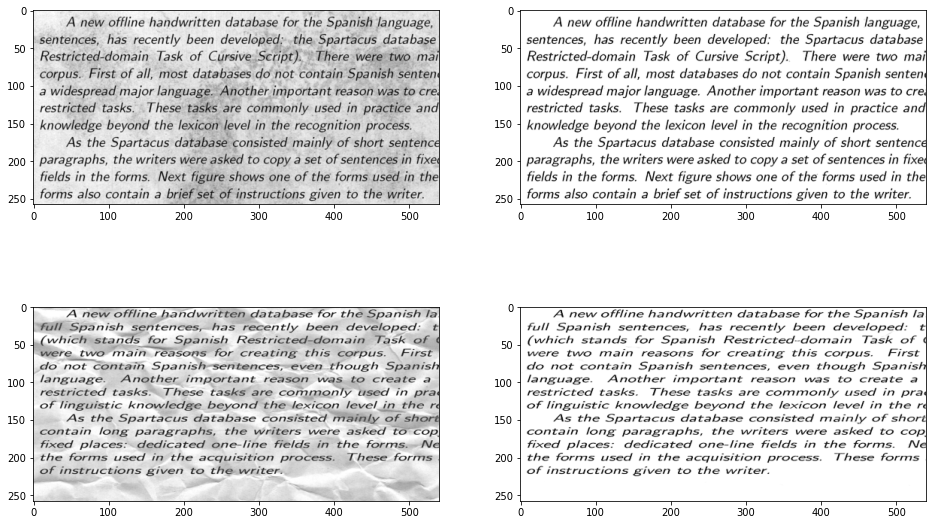

In [37]:
# We check sample image
f, ax = plt.subplots(2,2, figsize=(16,10))

# # we need to reshape the image removing the channel as we are using 'plt.imshow'.
ax[0,0].imshow(new_test[0].reshape(258, 540), cmap='gray', ) 
ax[0,1].imshow(predictions[0].reshape(258, 540), cmap='gray')
ax[1,0].imshow(new_test[1].reshape(258, 540), cmap='gray') 
ax[1,1].imshow(predictions[1].reshape(258, 540), cmap='gray')
plt.show()

### Conclusions:
* We can see the images have been denoised and the Loss was achieved at 0.0008.